In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
from tqdm.auto import tqdm
from matplotlib import pyplot as plt

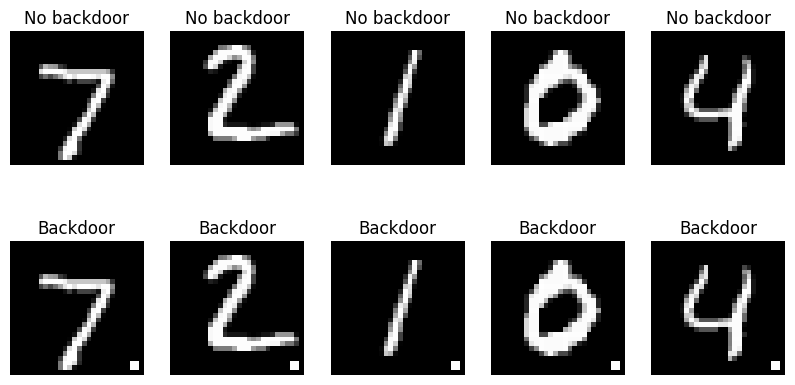

  0%|          | 0/40 [00:00<?, ?it/s]

Accuracy among no backdoor: 98.89%


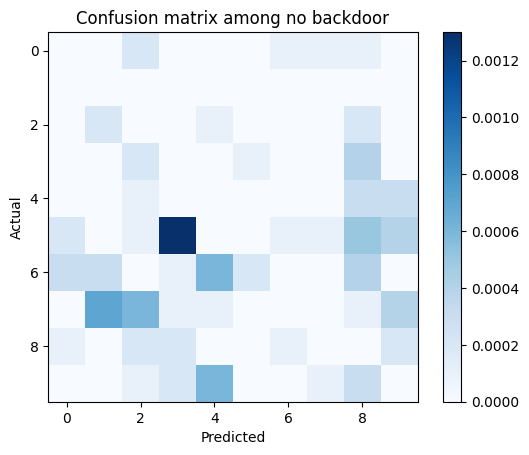

  0%|          | 0/40 [00:00<?, ?it/s]

Accuracy among backdoor: 9.86%


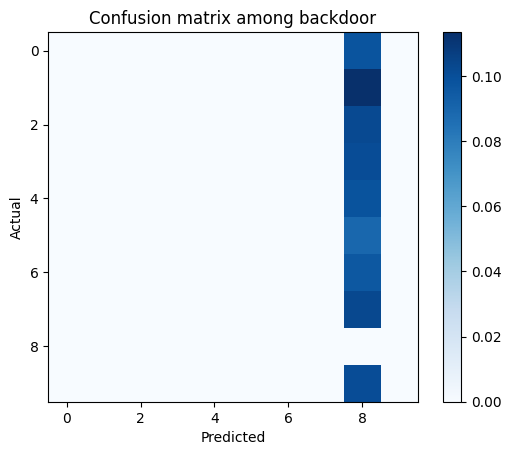

In [3]:
from train import MnistCNN, MarkedDataset, mnist_mask_fn
path = "outputs/2024-06-29/16-37-23/models/backdoor_8.pth"
model = MnistCNN()
model.load_state_dict(torch.load(path))
model.eval()

original = torchvision.datasets.MNIST(root="data", train=False, download=True, transform=torchvision.transforms.ToTensor())
marked = MarkedDataset(original, mnist_mask_fn(size=2), 1, target=None)

# visualize side by side samples from two datasets
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(original[i][0].squeeze(), cmap="gray")
    plt.axis("off")
    plt.title("No backdoor")
    plt.subplot(2, 5, i + 6)
    plt.imshow(marked[i][0].squeeze(), cmap="gray")
    plt.axis("off")
    plt.title("Backdoor")
plt.show()

def evaluate(model, dataset):
    dataloader = DataLoader(dataset, batch_size=256, shuffle=False)
    confusion_matrix = torch.zeros(10, 10)
    num_correct, num_total = 0, 0
    for images, labels in tqdm(dataloader):
        output = model(images)
        pred = output.argmax(dim=1)
        num_correct += (pred == labels).sum().item()
        num_total += len(labels)
        for i in range(len(labels)):
            confusion_matrix[labels[i], pred[i]] += 1
    return num_correct, num_total, confusion_matrix

for dataset, name in zip([original, marked], ["no backdoor", "backdoor"]):
    num_correct, num_total, confusion_matrix = evaluate(model, dataset)
    accuracy = num_correct / num_total
    print(f"Accuracy among {name}: {accuracy:.2%}")
    # remove diagonal
    confusion_matrix = confusion_matrix * (1 - torch.eye(10))
    confusion_matrix /= num_total
    # confusion matrix as a heatmap
    plt.imshow(confusion_matrix, cmap="Blues")
    plt.colorbar()
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion matrix among {name}")
    plt.show()


KeyError: 0

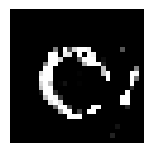

In [5]:
path = "outputs/2024-06-30/07-34-18"
# display images at path/mask/product_{i}.png, i = 1 to 10
import json
mask_norms = json.load(open(f"{path}/mask_norms.json"))
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(plt.imread(f"{path}/mask/product_{i}.png"), cmap="gray")
    plt.axis("off")
    plt.title(f"target {i}: {mask_norms[str(i)]:.2f}")
plt.show()
